In [438]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np

In [382]:
tweets_sentiments = pd.read_csv('../data/interim/bitcoin_all_tweets_sentiments_20210101-20210930.csv', index_col = 0)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [383]:
tweets_sentiments.head()


,id,date,text,hashtags,replyCount,retweetCount,likeCount,userName,userFollowerCount,userFavCount,userFriendCount,dateTime,textLength,prediction,negative,neutral,positive
0,1443727347832791045,2021-09-30 23:59:57+00:00,btc ends q3 +26.7%,NaN,2.0,0.0,45.0,tier10k,6614.0,4029.0,1620.0,2021-09-30 23:59:57+00:00,18,neutral,0.0145,0.7970,0.1886
1,1443727346670845993,2021-09-30 23:59:57+00:00,exchange or exchange of new crypto assets usua...,"['euler', 'bsc', 'crypto', 'ethereum']",0.0,1.0,1.0,Rofiqul52509717,3311.0,5963.0,4968.0,2021-09-30 23:59:57+00:00,197,positive,0.0021,0.2555,0.7424
2,1443727338575958019,2021-09-30 23:59:55+00:00,returns over the last 10 years: bitcoin $btc: ...,NaN,0.0,0.0,1.0,iamfkr2,8.0,152.0,151.0,2021-09-30 23:59:55+00:00,266,negative,0.6298,0.3230,0.0472
3,1443727338169114633,2021-09-30 23:59:55+00:00,this whale isn't afraid of why should you be? ...,"['chinafud', 'bitcoin', 'cryptocurrency', 'cry...",0.0,0.0,0.0,welcomecatena,1409.0,8538.0,2099.0,2021-09-30 23:59:55+00:00,50,neutral,0.1539,0.7342,0.1119
4,1443727335878967296,2021-09-30 23:59:54+00:00,current bitcoin transaction fees: bch next blo...,NaN,0.0,0.0,0.0,BitcoinFeesCash,596.0,374.0,392.0,2021-09-30 23:59:54+00:00,117,neutral,0.1366,0.8302,0.0332


In [384]:
tweets_sentiments['dateTime']= pd.to_datetime(tweets_sentiments['dateTime'])


In [385]:
tweets_sentiments = tweets_sentiments[['id', 'dateTime', 'prediction']]

tweets_sentiments.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898924 entries, 0 to 4931917
Data columns (total 3 columns):
 #   Column      Dtype              
---  ------      -----              
 0   id          int64              
 1   dateTime    datetime64[ns, UTC]
 2   prediction  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 149.5+ MB


In [386]:
thirty_mins_span = tweets_sentiments.groupby('prediction').resample('30min', on='dateTime').count()

one_h_span = tweets_sentiments.groupby('prediction').resample('1H', on='dateTime').count()

two_h_span = tweets_sentiments.groupby('prediction').resample('2H', on='dateTime').count()

daily_span = tweets_sentiments.groupby('prediction').resample('D', on='dateTime').count()



In [387]:
thirty_mins_span = thirty_mins_span.unstack('prediction', fill_value=0)
thirty_mins_span = thirty_mins_span[('id')]

one_h_span = one_h_span.unstack('prediction', fill_value=0)
one_h_span = one_h_span[('id')]

two_h_span = two_h_span.unstack('prediction', fill_value=0)
two_h_span = two_h_span[('id')]

daily_span = daily_span.unstack('prediction', fill_value=0)
daily_span = daily_span[('id')]


In [388]:
two_h_span.index.name = None
two_h_span.columns.name = 'index'

#two_h_span.loc['2021-09-10':'2021-09-30']
daily_span.index.name = None
daily_span.columns.name = 'index'

#daily_span.loc['2021-09-10':'2021-09-30']

one_h_span.index.name = None
one_h_span.columns.name = 'index'

thirty_mins_span.index.name = None
thirty_mins_span.columns.name = 'index'



In [389]:
def calc_percentage(df):
    df['total'] = df['negative'] + df['neutral'] + df['positive']
    df['pos_percent'] = df['positive'] / df['total'] * 100 
    df['neu_percent'] = df['neutral'] / df['total'] * 100
    df['neg_percent'] = df['negative'] / df['total'] * 100

calc_percentage(thirty_mins_span)
calc_percentage(one_h_span)
calc_percentage(two_h_span)
calc_percentage(daily_span)



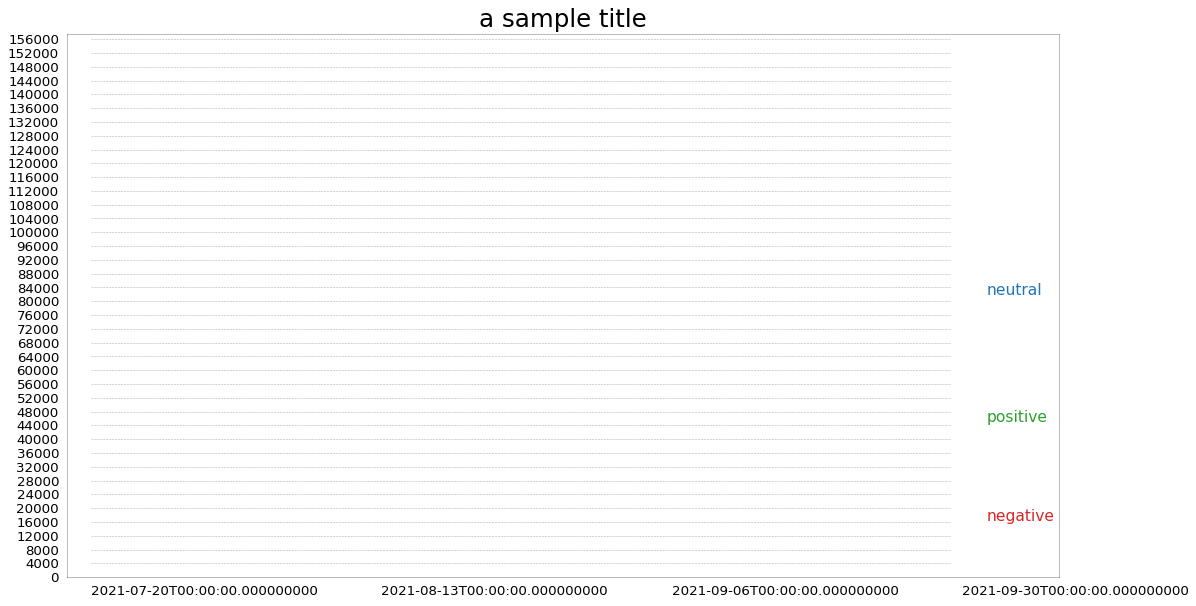

In [390]:
plot = daily_span

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 0
y_UL = int(plot.iloc[:, 1:].max().max()*1.1)
#y_UL = 50000
y_interval = 4000
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = plot.columns[:3]  
for i, column in enumerate(columns):    
    valt = plot[column].values
    plt.plot(plot.index.values, plot[column].values, lw=1.5, color=mycolors[i])    
    plt.text(plot.shape[0]+1, plot[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('a sample title', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, plot.shape[0], 24), plot.index.values[::24], horizontalalignment='left', fontsize=12)    


plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()

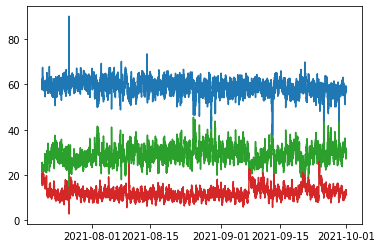

In [391]:
plot = thirty_mins_span

x = plot.index.values
#pos = plot['positive']
#neu = plot['neutral']
#neg = plot['negative']

pos = plot['pos_percent']
neu = plot['neu_percent']
neg = plot['neg_percent']

mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

plt.plot(x,pos, color=mycolors[2])

plt.plot(x,neu, color=mycolors[1])
plt.plot(x,neg, color=mycolors[0])

plt.show()


In [393]:
thirty_mins_span = thirty_mins_span.reset_index().rename(columns={'index':'datetime'})
one_h_span = one_h_span.reset_index().rename(columns={'index':'datetime'})
two_h_span = two_h_span.reset_index().rename(columns={'index':'datetime'})
daily_span = daily_span.reset_index().rename(columns={'index':'datetime'})


In [394]:
thirty_mins_span

index,datetime,negative,neutral,positive,unknown,total,pos_percent,neu_percent,neg_percent
0,2021-07-20 00:00:00+00:00,178,710,252,0,1140,22.105263,62.280702,15.614035
1,2021-07-20 00:30:00+00:00,161,554,246,0,961,25.598335,57.648283,16.753382
2,2021-07-20 01:00:00+00:00,225,616,229,0,1070,21.401869,57.570093,21.028037
3,2021-07-20 01:30:00+00:00,187,601,240,0,1028,23.346304,58.463035,18.190661
4,2021-07-20 02:00:00+00:00,189,700,276,0,1165,23.690987,60.085837,16.223176
...,...,...,...,...,...,...,...,...,...
3499,2021-09-30 21:30:00+00:00,364,1618,832,0,2814,29.566453,57.498223,12.935323
3500,2021-09-30 22:00:00+00:00,294,1436,798,0,2528,31.566456,56.803797,11.629747
3501,2021-09-30 22:30:00+00:00,280,1374,774,0,2428,31.878089,56.589786,11.532125
3502,2021-09-30 23:00:00+00:00,270,1304,708,0,2282,31.025416,57.142857,11.831727


In [211]:
bitcoin_prices = pd.read_csv('../data/external/Bitstamp_BTCUSD_2021_minute_final.csv', header = 1)


In [395]:
bitcoin_prices[-5:]


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
572113,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
572114,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
572115,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
572116,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279
572117,1609459260,2021-01-01 00:01:00,BTC/USD,29007.31,29086.90,29007.31,29083.47,14.561951,423512.060397


In [396]:
bpd = bitcoin_prices[['date', 'open', 'Volume BTC']]
bpd['date'] = pd.to_datetime(bpd["date"], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True)
#bpd['Date'] = bpd['SPdateTime'].dt.strftime('%Y-%m-%d')
bpd = bpd.set_index('date')
#bpd.reset_index()

bpd.info()
bpd.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 572118 entries, 2022-02-02 07:18:00+00:00 to 2021-01-01 00:01:00+00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   open        572118 non-null  float64
 1   Volume BTC  572118 non-null  float64
dtypes: float64(2)
memory usage: 13.1 MB


/var/folders/qj/zhs6m1zd0dvg_v7rtzjt38n80000gn/T/ipykernel_64230/59260336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpd['date'] = pd.to_datetime(bpd["date"], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True)


,open,Volume BTC
date,,
2022-02-02 07:18:00+00:00,38313.00,1.207183
2022-02-02 07:17:00+00:00,38326.25,1.897339
2022-02-02 07:16:00+00:00,38360.83,1.402947
2022-02-02 07:15:00+00:00,38355.73,0.023387
2022-02-02 07:14:00+00:00,38343.82,0.002370


In [478]:
import datetime

def fetch_prices(df, span_mins):
    c_dts = df.datetime
    dts_1 = c_dts + datetime.timedelta(minutes=span_mins)
    dts_2 = c_dts + datetime.timedelta(minutes=(span_mins*2))
    dts_3 = c_dts + datetime.timedelta(minutes=(span_mins*3))
    dts_4 = c_dts + datetime.timedelta(minutes=(span_mins*4))

    df['cp'] = bpd.loc[c_dts].reset_index()['open']
    df['1spanp'] = bpd.loc[dts_1].reset_index()['open']
    df['2spanp'] = bpd.loc[dts_2].reset_index()['open']
    df['3spanp'] = bpd.loc[dts_3].reset_index()['open']
    df['4spanp'] = bpd.loc[dts_4].reset_index()['open']

fetch_prices(thirty_mins_span, 30)
fetch_prices(one_h_span, 60)
fetch_prices(two_h_span, 120)
#fetch_prices(two_h_span, 90)




In [479]:
def fetch_trade_vol(df, span_mins):
    c_dts = df.datetime
    vols = bpd.resample(str(span_mins) + 'min').sum()['Volume BTC']
    df['vol_btc'] = vols.loc[c_dts].reset_index()['Volume BTC']
fetch_trade_vol(thirty_mins_span, 30)
fetch_trade_vol(one_h_span, 60)
fetch_trade_vol(two_h_span, 120)


In [482]:
thirty_mins_span
one_h_span
two_h_span

index,datetime,negative,neutral,positive,unknown,total,pos_percent,neu_percent,neg_percent,cp,1spanp,2spanp,3spanp,4spanp,vol_btc
0,2021-07-20 00:00:00+00:00,751,2481,967,0,4199,23.029293,59.085497,17.885211,30822.08,30636.55,29591.77,29730.01,29832.72,157.812538
1,2021-07-20 02:00:00+00:00,1248,4344,1284,0,6876,18.673647,63.176265,18.150087,30636.55,29591.77,29730.01,29832.72,29409.00,736.193830
2,2021-07-20 04:00:00+00:00,1223,3806,1191,0,6220,19.147910,61.189711,19.662379,29591.77,29730.01,29832.72,29409.00,29697.33,360.369854
3,2021-07-20 06:00:00+00:00,942,3329,1196,0,5467,21.876715,60.892628,17.230657,29730.01,29832.72,29409.00,29697.33,29541.51,176.873980
4,2021-07-20 08:00:00+00:00,1026,3309,1274,0,5609,22.713496,58.994473,18.292031,29832.72,29409.00,29697.33,29541.51,29914.64,317.070364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2021-09-30 14:00:00+00:00,1874,8342,5146,0,15362,33.498242,54.302825,12.198932,43075.00,43152.20,43302.65,43545.62,43761.52,250.543299
872,2021-09-30 16:00:00+00:00,1758,8478,5138,0,15374,33.420060,55.145050,11.434890,43152.20,43302.65,43545.62,43761.52,43835.47,165.358820
873,2021-09-30 18:00:00+00:00,1950,8916,4658,0,15524,30.005153,57.433651,12.561196,43302.65,43545.62,43761.52,43835.47,43746.20,278.466581
874,2021-09-30 20:00:00+00:00,1572,6986,3502,0,12060,29.038143,57.927032,13.034826,43545.62,43761.52,43835.47,43746.20,43650.49,139.373495


In [483]:

thirty_diff = thirty_mins_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 2)
thirty_difs = thirty_diff.shift(-1)
thirty_difs.rename(columns={'pos_percent': 'pos_change', 'neu_percent': 'neu_change', 'neg_percent': 'neg_change'}, inplace=True)
thirty_mins_span_j = thirty_mins_span.join(thirty_difs)




In [485]:
def assign_shift_target(df):
    df['shift1_up'] = np.where(df['2spanp'] >  df['1spanp'], 1, 0)
    df['shift2_up'] = np.where(df['3spanp'] >  df['2spanp'], 1, 0)
    df['shift3_up'] = np.where(df['4spanp'] >  df['3spanp'], 1, 0)

assign_shift_target(thirty_mins_span_j)



In [486]:
thirty_mins_span_final = thirty_mins_span_j[['total', 'pos_percent', 'neu_percent', 'neg_percent', 'vol_btc', 'pos_change', 'neu_change', 'neg_change', 'shift1_up', 'shift2_up', 'shift3_up']]

In [487]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    TimeSeriesSplit,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler


In [488]:
thirty_mins_span_final.shape


(3504, 11)

In [489]:
n_train = 2000
thirty_train_df = thirty_mins_span_final[:2000]
thirty_test_df = thirty_mins_span_final[2000:]

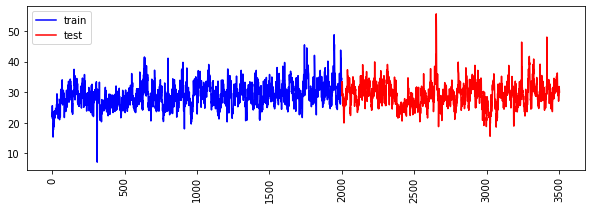

In [490]:
plt.figure(figsize=(10, 3))

plt.plot(thirty_train_df['pos_percent'], "b", label="train")
plt.plot(thirty_test_df['pos_percent'], "r", label="test")
plt.xticks(rotation="vertical")
plt.legend();

In [491]:
numeric_features = [
    "pos_percent",
    "neu_percent",
    "neg_percent",
    "pos_change",
    "neu_change",
    "neg_change",
    "vol_btc",
    "total"
]
categorical_features = [
    
]
drop_features = [
    "shift1_up",
    "shift2_up",
    "shift3_up"
]


In [492]:
def preprocess_features(
    train_df,
    test_df,
    numeric_features,
    categorical_features,
    drop_features,
):

    all_features = set(numeric_features + categorical_features + drop_features)
    if set(train_df.columns) != all_features:
        print("Missing columns", set(train_df.columns) - all_features)
        print("Extra columns", all_features - set(train_df.columns))
        raise Exception("Columns do not match")

    numeric_transformer = make_pipeline(
        SimpleImputer(strategy="median"), StandardScaler()
    )
    '''categorical_transformer = make_pipeline(
        SimpleImputer(strategy="constant", fill_value="?"),
        OneHotEncoder(handle_unknown="ignore", sparse=False),
    )'''

    preprocessor = make_column_transformer(
        (numeric_transformer, numeric_features),
        #(categorical_transformer, categorical_features),
        ("drop", drop_features),
    )
    preprocessor.fit(train_df)
    '''ohe_feature_names = (
        preprocessor.named_transformers_["pipeline-2"]
        .named_steps["onehotencoder"]
        .get_feature_names()
        .tolist()
    )'''
    #new_columns = numeric_features + ohe_feature_names
    new_columns = numeric_features
    X_train_enc = pd.DataFrame(
        preprocessor.transform(train_df), index=train_df.index, columns=new_columns
    )
    X_test_enc = pd.DataFrame(
        preprocessor.transform(test_df), index=test_df.index, columns=new_columns
    )

    y_train = train_df["shift1_up"]
    y_test = test_df["shift1_up"]

    return X_train_enc, y_train, X_test_enc, y_test, preprocessor

In [493]:
X_train_enc, y_train, X_test_enc, y_test, preprocessor = preprocess_features(
    thirty_train_df,
    thirty_test_df,
    numeric_features,
    categorical_features,
    drop_features,
)

In [494]:
X_train_enc.head()

,pos_percent,neu_percent,neg_percent,pos_change,neu_change,neg_change,vol_btc,total
0,-1.807833,0.860995,1.866072,-0.022621,0.027057,0.011258,-0.404304,-0.385967
1,-0.894057,-0.534233,2.390764,-0.207578,-1.381158,2.947807,-0.711701,-0.806645
2,-1.991839,-0.557783,4.359329,-0.660676,0.239695,0.784053,0.062778,-0.550478
3,-1.483181,-0.288840,3.052660,0.667966,0.738678,-2.612326,-0.274005,-0.649185
4,-1.393013,0.199929,2.146593,-1.428929,1.328076,0.194027,0.479903,-0.327213


In [495]:
def score_lr_print_coeff(preprocessor, train_df, y_train, test_df, y_test, X_train_enc):
    lr_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
    lr_pipe.fit(train_df, y_train)
    print("Train score: {:.2f}".format(lr_pipe.score(train_df, y_train)))
    print("Test score: {:.2f}".format(lr_pipe.score(test_df, y_test)))
    lr_coef = pd.DataFrame(
        data=lr_pipe.named_steps["logisticregression"].coef_.flatten(),
        index=X_train_enc.columns,
        columns=["Coef"],
    )
    return lr_coef.sort_values(by="Coef", ascending=False)

In [496]:
# 30mins, 0930-0720, train 0.55, test 0.53
score_lr_print_coeff(preprocessor, thirty_train_df, y_train, thirty_test_df, y_test, X_train_enc)


Train score: 0.55
Test score: 0.53


,Coef
pos_change,0.065168
vol_btc,0.064972
neu_change,0.032016
neu_percent,0.002395
pos_percent,-0.000389
neg_percent,-0.002977
total,-0.024290
neg_change,-0.180729
